# Termination Analysis FY23-24

## Data Import and Preview

This section loads the cleaned termination dataset and displays the first few rows. Columns include:

- DEPARTMENTNAME: Department at time of termination

- Action_Name: Voluntary or involuntary exit

- Tenure_Years: Duration of employment before exit

In [9]:
import pandas as pd
term_data = "CLEANED_Termination_FY23-24.xlsx"
termination_df = pd.read_excel(term_data)
print(termination_df.head())

                 DEPARTMENTNAME  Employee_ID       Full_Name  \
0  Budget & Management Services          534  Crews, Carolyn   
1  Budget & Management Services        34614    Esler, Holly   
2  Budget & Management Services        30191    Eres, Albert   
3                      Building        34123   Gatlin, Cindy   
4                      Building        20994      Polk, Lonn   

                              Job_Title Action_Name       Reason  \
0  Senior Management and Budget Analyst   Voluntary          NaN   
1      Management and Budget Analyst II   Voluntary  Another Job   
2  Senior Management and Budget Analyst   Voluntary  Another Job   
3                     Permit Technician   Voluntary     Personal   
4        Driveway/Drainage Inspector II   Voluntary  Another Job   

  Assignment_Status_Type Termination_Date Start_Date  Tenure_Days  \
0               INACTIVE       2024-05-31 1985-02-27        14338   
1               INACTIVE       2023-10-23 2023-09-18           35   

## Employee Tenure at Exit (Histogram)
---
This histogram visualizes the distribution of employee tenure at the time of termination during FY23–24.

- The **X-axis** represents tenure in years.
- The **Y-axis** shows the number of employees who left within each tenure range.
- Employees with missing or invalid tenure data were excluded from this chart.

### Key Observations:
- The distribution is **right-skewed**, indicating that a large number of employees exited early in their tenure.
- There is a visible **spike in terminations under 1 year**, suggesting early-stage turnover may be a concern.
- A smaller, long-tail group exited after 10+ years — likely retirees or late-career transitions.

This analysis provides a foundation for creating tenure "buckets" (e.g., <1 year, 1–3 years, 3–5 years, 5+) for further segmentation.

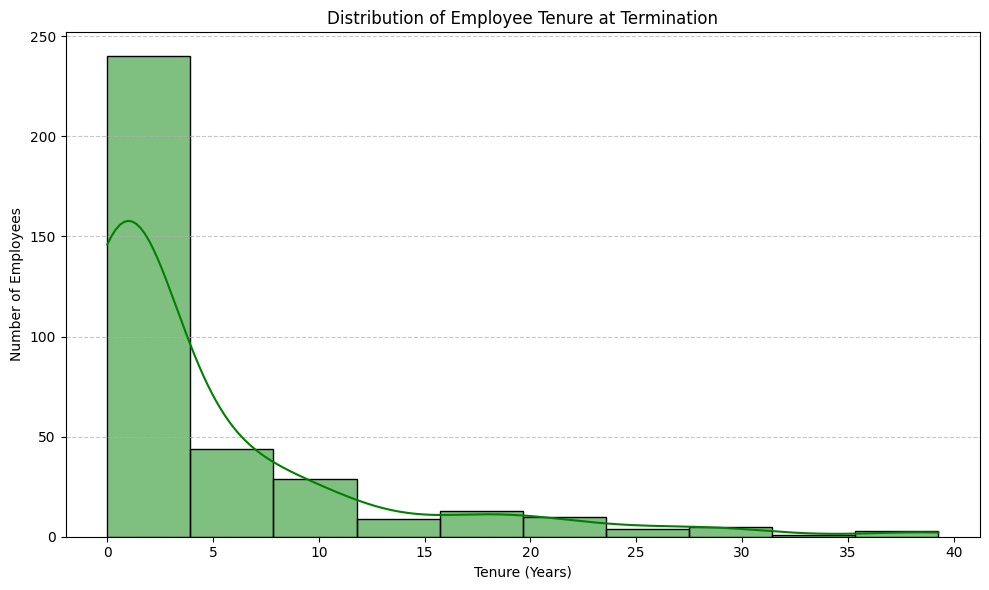

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
termination_df = termination_df.dropna(subset=["Tenure_Years"])
plt.figure(figsize=(10, 6))
sns.histplot(termination_df["Tenure_Years"], bins=10, kde=True, color="green", edgecolor="black")

plt.title("Distribution of Employee Tenure at Termination")
plt.xlabel("Tenure (Years)")
plt.ylabel("Number of Employees")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Total Terminations
We count the total number of terminations during the period.

In [11]:
termination_df.shape[0]

358

## Breakdown by Termination Type
We look at how many exits were voluntary versus involuntary.

In [12]:
termination_df['Action_Name'].value_counts()

Action_Name
Voluntary      281
Involuntary     73
Death            4
Name: count, dtype: int64

## Top Departments by Termination Count
This chart shows the top 10 departments with the most terminations.

In [13]:
termination_df['DEPARTMENTNAME'].value_counts().head(10)

DEPARTMENTNAME
Fire Rescue                    88
Roads and Drainage             43
Parks and Natural Resources    37
Health & Human Services        32
Utilities                      32
Tourism/Sports Marketing       15
Solid Waste Division           15
Facilities Management          13
Building                       12
Court Services                 11
Name: count, dtype: int64

In [14]:
termination_by_dept_action = (
    termination_df
    .groupby(['DEPARTMENTNAME', 'Action_Name'])
    .size()
    .unstack(fill_value=0)  # Converts the 'Action_Name' values into columns
    .sort_values(by='Voluntary', ascending=False)  # Sort by most voluntary exits
    .head(10)
)

print(termination_by_dept_action)

Action_Name                  Death  Involuntary  Voluntary
DEPARTMENTNAME                                            
Fire Rescue                      1           11         76
Parks and Natural Resources      0            3         34
Roads and Drainage               0           15         28
Utilities                        1            5         26
Health & Human Services          0           15         17
Facilities Management            0            1         12
Court Services                   0            0         11
Building                         0            2         10
Solid Waste Division             0            6          9
Tourism/Sports Marketing         0            7          8


## Average Tenure by Exit Type
We calculate average tenure separately for voluntary and involuntary exits to compare patterns.

In [15]:
average_tenure = termination_df['Tenure_Years'].mean()
print(f"Average tenure at exit: {average_tenure:.2f} years")

Average tenure at exit: 4.80 years


In [16]:
average_tenure_bytype = termination_df.groupby('Action_Name')['Tenure_Years'].mean()
print(f"Average tenure by type: {average_tenure_bytype} years")

Average tenure by type: Action_Name
Death          13.316438
Involuntary     2.595159
Voluntary       5.257817
Name: Tenure_Years, dtype: float64 years


## Key Insights and Recommendations
- A significant number of exits occurred **within the first year** of employment.

- Frontline departments like Fire Rescue and Roads & Drainage had higher voluntary turnover, suggesting a need to improve onboarding or early-stage support.

**Recommendations:**

- Conduct exit interviews focused on first-year employees.

- Review job previews, training, and supervisor relationships in high-turnover areas.